<a href="https://colab.research.google.com/github/Sezo-code/Michine-Learning/blob/main/Decision_Tree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv('/content/titanic (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
display(df_selected.head())

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


/tmp/ipython-input-2338827181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex_encoded'] = le.fit_transform(df_selected['Sex'])


,Survived,Pclass,Sex,Age,Fare,Sex_encoded
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [10]:
df_selected = df_selected.drop('Sex', axis=1)

display(df_selected.head())

,Survived,Pclass,Age,Fare,Sex_encoded
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [18]:
input = df_selected.drop('Survived', axis='columns')
target = df_selected['Survived']

In [39]:
inputs.head()

,Pclass,Age,Fare,Sex_encoded
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [44]:
input['Age'][:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [48]:
input['Age'] = input['Age'].fillna(input['Age'].mean())
input.head()

,Pclass,Age,Fare,Sex_encoded
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [49]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(input,target,test_size=0.2)

In [52]:
len(X_train)

712

In [53]:
len(X_test)

179

In [54]:
from sklearn import tree

In [55]:
model = tree.DecisionTreeClassifier()

In [56]:
model.fit(input,target)

DecisionTreeClassifier()

In [57]:
model.score(input,target)

0.9797979797979798

In [58]:
# Make a prediction with the trained model
# Assuming Pclass = 3 for this prediction
prediction_input = [[3, 25, 35, 1]] # Pclass, Age, Fare, Sex_encoded
predicted_survival = model.predict(prediction_input)

if predicted_survival[0] == 1:
    print("The model predicts survival.")
else:
    print("The model predicts not surviving.")

The model predicts not surviving.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


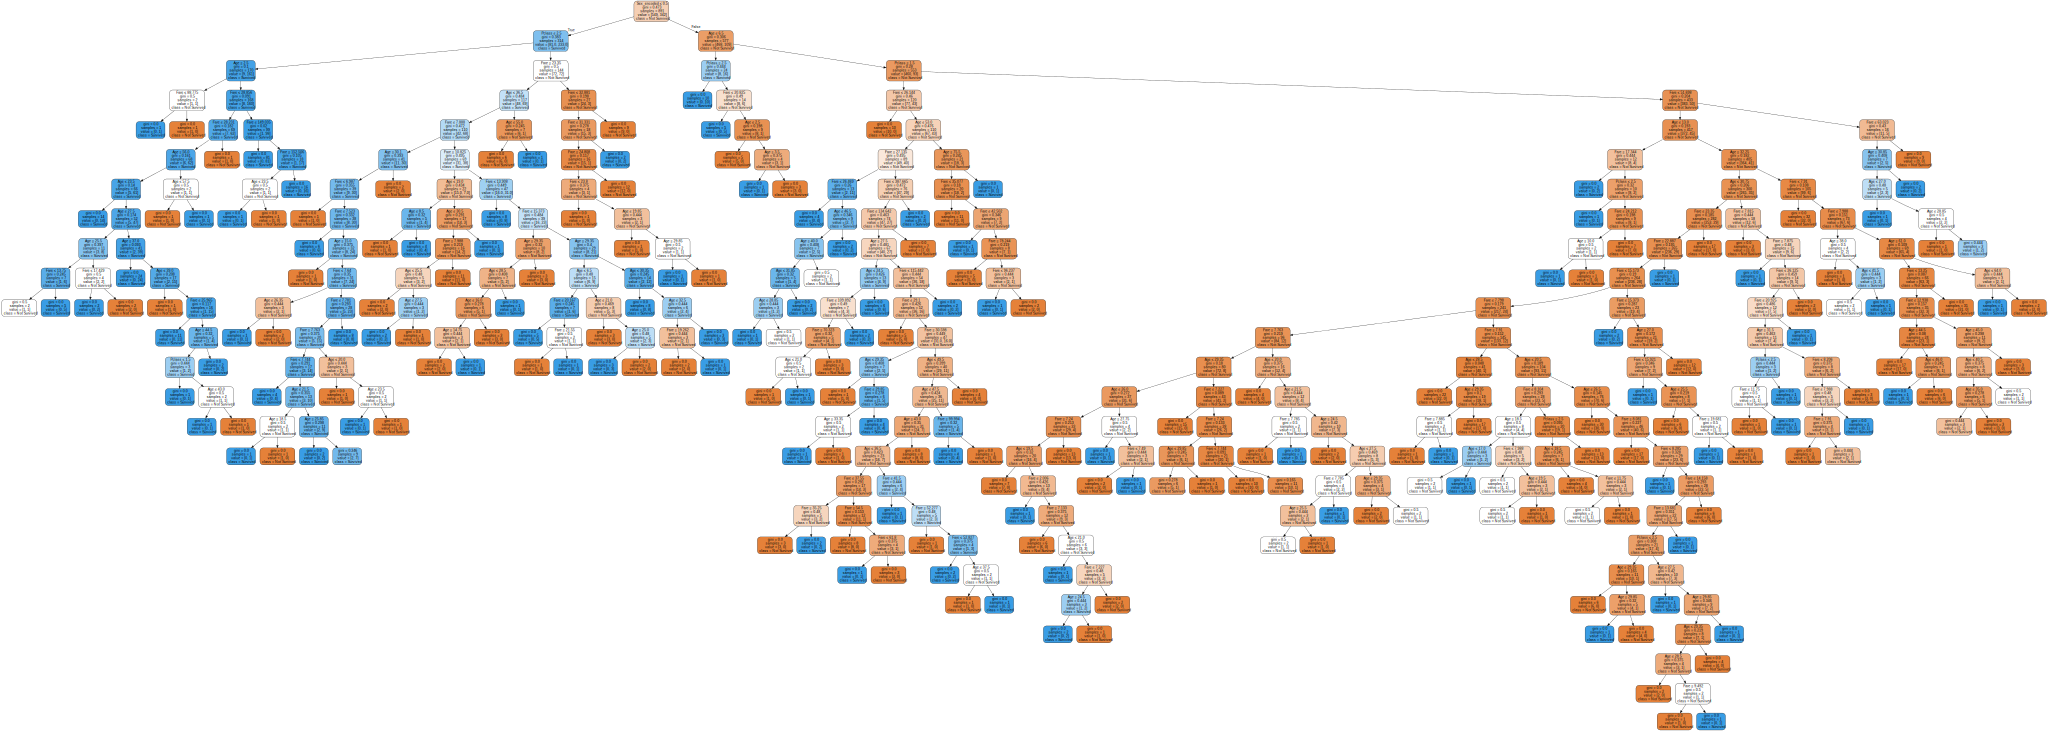

In [59]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=input.columns,
                           class_names=['Not Survived', 'Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Render the decision tree using graphviz
graph = graphviz.Source(dot_data)
display(graph)

In [27]:
# To download the graph, you can save it to a file.
# For example, saving as a PNG file:
graph.render("decision_tree", view=False, format="png")

print("Decision tree saved as decision_tree.png")
# You can then download this file from the Colab file browser (folder icon on the left)

Decision tree saved as decision_tree.png
